In [1]:
import QuantLib as ql
import matplotlib.pyplot as plt
%matplotlib inline

In [40]:
# option data
maturity_date = ql.Date(27, 10, 2020)
spot_price = 165
strike_price = 150
volatility = 0.10 # the historical vols for a year
dividend_rate =  0.002
option_type = ql.Option.Call

risk_free_rate = 0.003
day_count = ql.Actual365Fixed()
calendar = ql.UnitedStates()

calculation_date = ql.Date(27, 10, 2019)
ql.Settings.instance().evaluationDate = calculation_date

In [41]:
# construct the European Option
payoff = ql.PlainVanillaPayoff(option_type, strike_price)
exercise = ql.EuropeanExercise(maturity_date)
european_option = ql.VanillaOption(payoff, exercise)

In [42]:
spot_handle = ql.QuoteHandle(
    ql.SimpleQuote(spot_price)
)
flat_ts = ql.YieldTermStructureHandle(
    ql.FlatForward(calculation_date, risk_free_rate, day_count)
)
dividend_yield = ql.YieldTermStructureHandle(
    ql.FlatForward(calculation_date, dividend_rate, day_count)
)
flat_vol_ts = ql.BlackVolTermStructureHandle(
    ql.BlackConstantVol(calculation_date, calendar, volatility, day_count)
)
bsm_process = ql.BlackScholesMertonProcess(spot_handle, 
                                           dividend_yield, 
                                           flat_ts, 
                                           flat_vol_ts)

In [43]:
european_option.setPricingEngine(ql.AnalyticEuropeanEngine(bsm_process))
bs_price = european_option.NPV()
print("The theoretical price is ", bs_price)

The theoretical price is  16.526130191335188


In [35]:
def binomial_price(bsm_process, steps):
    binomial_engine = ql.BinomialVanillaEngine(bsm_process, "crr", steps)
    european_option.setPricingEngine(binomial_engine)
    return european_option.NPV()

def blackScholeMarton_price(steps):
    european_option.setPricingEngine(ql.AnalyticEuropeanEngine(bsm_process))
    return european_option.NPV()

steps = range(2, 100, 1)
prices = [binomial_price(bsm_process, step) for step in steps]
print(prices)

[4.150126185961586, 4.197119908136563, 4.185426306515085, 3.9953274733784063, 4.159084005297938, 3.9092600419634533, 4.129870297773684, 3.86166997052134, 4.104021976999564, 3.840377993772219, 4.081854078772972, 3.8937008425989905, 4.062817282154543, 3.9288179134429755, 4.046325195962748, 3.952663415472831, 4.03189249951223, 3.9691667009330334, 4.019138926670787, 3.9806966981623786, 4.007769312421713, 3.9887526762223953, 3.9975533972025707, 3.9943213377478397, 3.9883097561265517, 3.998073242730289, 3.979893797529798, 4.000476478103745, 3.9721889501756307, 4.001865279636112, 3.9651001911869925, 4.002482969294736, 3.9585492593155047, 4.002509659921773, 3.952471079331412, 4.002080614140936, 3.9468110616336602, 4.001298697438149, 3.9415230400198453, 4.000243001079253, 3.936567679603453, 3.9989749232546052, 3.936416888462069, 3.997542528514924, 3.942924360365971, 3.995983719326541, 3.948579320250185, 3.994328574340211, 3.953499344965326, 3.992601093253323, 3.957782813499961, 3.99082051326057

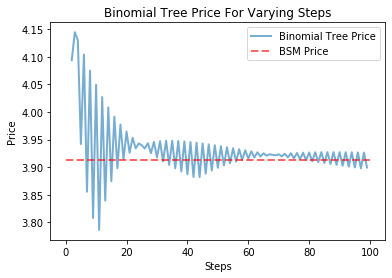

In [30]:
plt.plot(steps, prices, label="Binomial Tree Price", lw=2, alpha=0.6)
plt.plot([0,100],[bs_price, bs_price], "r--", label="BSM Price", lw=2, alpha=0.6)
plt.xlabel("Steps")
plt.ylabel("Price")
plt.title("Binomial Tree Price For Varying Steps")
plt.legend()